In [1]:
# Basic libraries
import os
import shutil
import random
import warnings
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from PIL import Image, UnidentifiedImageError


2025-05-18 03:02:35.103015: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 03:02:35.108212: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 03:02:35.123248: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747537355.148351    8933 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747537355.155939    8933 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747537355.175655    8933 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Split Data

In [2]:
cat_src = "C:/Documents/Machine Learning/Neural Network/Week 2/Cats Or Dogs Practical Model/train/cats"
dog_src = "C:/Documents/Machine Learning/Neural Network/Week 2/Cats Or Dogs Practical Model/train/dogs"

base_dir = "C:/Documents/Machine Learning/Neural Network/Week 2/Cats Or Dogs Practical Model"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [3]:
image_size = (180, 180)
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale = 1./255)

Load Data

In [4]:
# Load training data from folder
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode='binary'  # Because it's a 2-class problem
)

# Load validation data from folder
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode='binary'
)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Documents/Machine Learning/Neural Network/Week 2/Cats Or Dogs Practical Model/train'

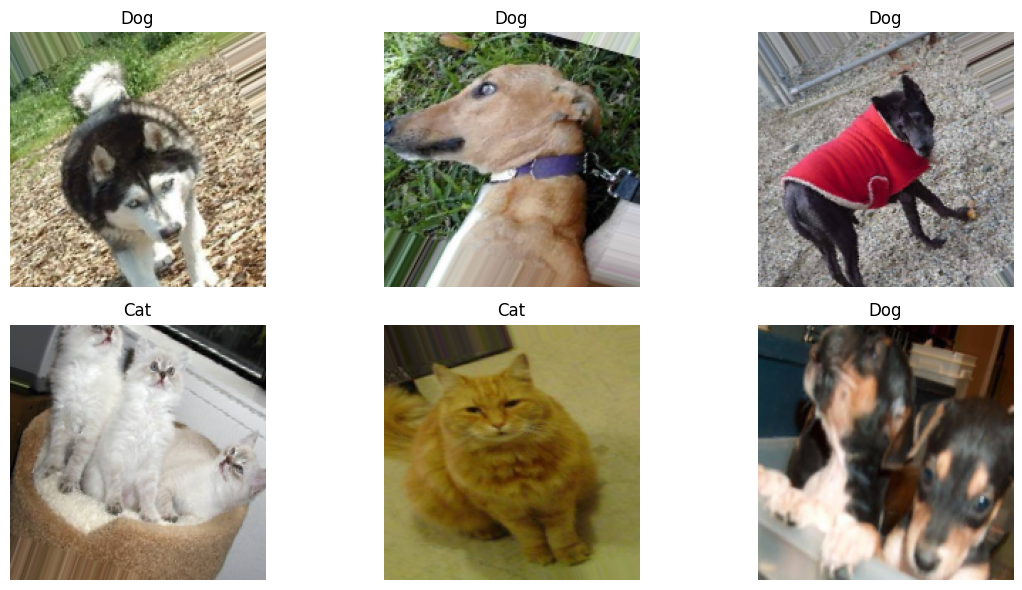

In [ ]:
images, labels = next(train_generator)

plt.figure(figsize = (12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title("Dog" if labels[i] == 1 else "Cat")
    plt.axis('off')
plt.tight_layout()
plt.show()

Build the CNN model

In [ ]:
model = models.Sequential([
    # Input layer
    layers.Input(shape = (180, 180, 3)),
    # Layer 1
    layers.Conv2D(32, (3, 3), activation = 'relu'),
    layers.MaxPooling2D(2, 2),
    # Layer 2
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D(2, 2),
    # Layer 3
    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.MaxPooling2D(2, 2),
    # Layer 4
    layers.Conv2D(256, (3, 3), activation = 'relu'),
    layers.MaxPooling2D(2, 2),
    # Flatten + Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid')
])

Lưu ý: Không nên dùng quá nhiều layers Conv2D và MaxPooling2D vì chúng có thể khiến ảnh bị chia quá nhỏ dẫn đến không thể đưa về dạng 3x3 để xử lý được

In [ ]:
optimizer  = Adam(learning_rate = 1e-3)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,006,273 (41.99 MB)

 Trainable params: 11,006,273 (41.99 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

##### Fix Plan

In [ ]:
def remove_invalid_images(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with warnings.catch_warnings():
                    warnings.simplefilter('error')
                    img = Image.open(file_path)
                    img.verify()
            except (UnidentifiedImageError, IOError, SyntaxError, Warning) as e:
                print(f"Removed invalid image: {file_path} ({e})")
                os.remove(file_path)
remove_invalid_images(train_dir)
remove_invalid_images(val_dir)

In [ ]:
# Load training data from folder
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode='binary'  # Because it's a 2-class problem
)

# Load validation data from folder
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
epoch = 24
H = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = epoch,
    verbose = 1,
    validation_data = val_generator,
    validation_steps = val_generator.samples // val_generator.batch_size
)

c:\Users\Nitro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/24
250/250 ━━━━━━━━━━━━━━━━━━━━ 170s 670ms/step - accuracy: 0.5211 - loss: 0.7278 - val_accuracy: 0.6064 - val_loss: 0.6851
Epoch 2/24
250/250 ━━━━━━━━━━━━━━━━━━━━ 232s 925ms/step - accuracy: 0.5771 - loss: 0.6731 - val_accuracy: 0.6361 - val_loss: 0.6384
Epoch 3/24
250/250 ━━━━━━━━━━━━━━━━━━━━ 240s 956ms/step - accuracy: 0.6286 - loss: 0.6455 - val_accuracy: 0.6865 - val_loss: 0.5989
Epoch 4/24
250/250 ━━━━━━━━━━━━━━━━━━━━ 237s 949ms/step - accuracy: 0.6817 - loss: 0.5909 - val_accuracy: 0.7142 - val_loss: 0.5613
Epoch 5/24
 70/250 ━━━━━━━━━━━━━━━━━━━━ 13:46 5s/step - accuracy: 0.6883 - loss: 0.5758

KeyboardInterrupt: 

Evaluate and Predict

In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.8770 - loss: 0.2882
Validation Accuracy: 0.8850
Validation Loss: 0.2753


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


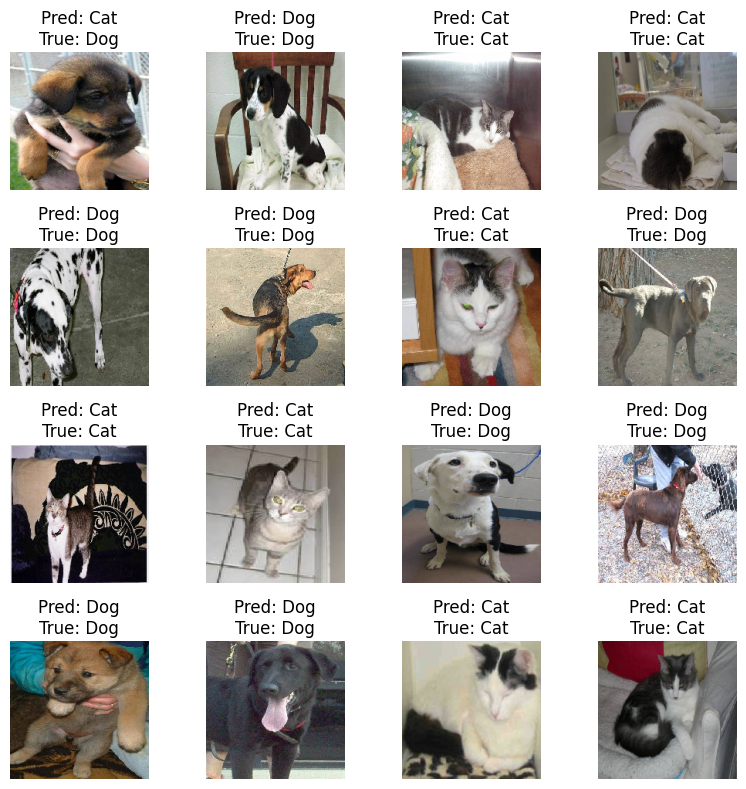

In [ ]:
batch = next(val_generator)
images, labels = batch[0], batch[1]
num_samples = min(16, len(images))
images = images[:num_samples]
labels = labels[:num_samples]
preds = model.predict(images)
grid_size = int(np.ceil(np.sqrt(num_samples)))
plt.figure(figsize = (2 * grid_size, 2 * grid_size))
for i in range(num_samples):
    plt.subplot(grid_size, grid_size, i + 1)
    plt.imshow(images[i])
    pred_label = 'Dog' if preds[i][0] > 0.5 else 'Cat'
    true_label = 'Dog' if labels[i] == 1 else 'Cat'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

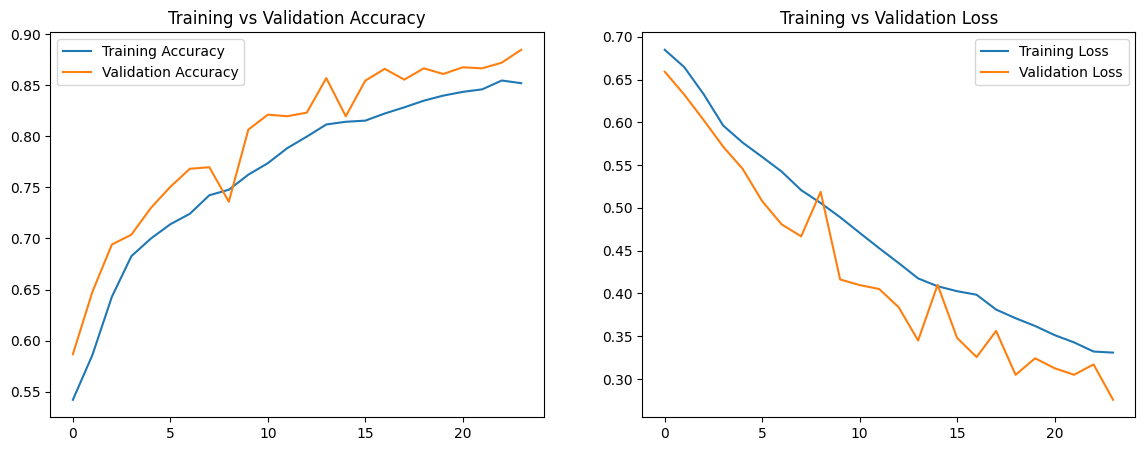

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')

    plt.show()

plot_training_history(H)
